# лабораторна робота по ИИ

## 1) один нейрон

In [36]:
import pandas as pd
import numpy as npt 
import matplotlib.pyplot as plt
from itertools import product

In [2]:
def neuron(x=[7,4,5], y=0.3, delta_error=0.1):     
    
    if len(x)!=3:
        print('error len of x')
        return 
    if type(y) is not float and type(y) is not int:
        print('error y type is uncorrect')
        return 
    if type(delta_error) is not float and type(delta_error) is not int:
        print('error delta_error type is uncorrect')
        return 
    
    
    # initialization var
    x = np.array([1] + x)
    w = np.random.normal(loc=0.1, scale=0.05, size=(len(x), 1))
    df = pd.DataFrame(columns=['w0', 'w1', 'w2', 'w3', 'y_predict', 'delta'])
    
    def predict(x_list):
        x_list = np.array([1] + x_list)
        s = np.dot(x_list, w)[0]
        y = activization_function(s)
        return y
    
    while True:
        
        s_m = np.dot(x, w)[0]
        y_m = activization_function(s_m)
        
        delta = abs((y_m - y) / y)
        df = df.append({'w0':w[0][0], 'w1':w[1][0], 'w2':w[2][0], 'w3':w[3][0], 'y_predict':y_m, 'delta': delta}, 
                       ignore_index=True)
        
        if delta <= delta_error: 
            return df, predict
        
        eta = y_m*(1-y_m)
        delta_w = eta * (y - y_m) * x
        w = w + delta_w.reshape(len(x), 1)
        

In [3]:
def activization_function(sum_x):
    return 1/(1 + np.exp(-sum_x))

In [4]:
df, prd = neuron()
df[-10:]

,w0,w1,w2,w3,y_predict,delta
46,0.062987,-0.249310,-0.020074,-0.176052,0.066438,0.778540
47,0.077473,-0.147905,0.037871,-0.103620,0.210075,0.299750
48,0.092396,-0.043447,0.097561,-0.029008,0.508367,0.694556
49,0.040319,-0.407987,-0.110747,-0.289393,0.008964,0.970120
50,0.042904,-0.389889,-0.100406,-0.276466,0.011315,0.962284
51,0.046134,-0.367283,-0.087488,-0.260319,0.015122,0.949595
52,0.050376,-0.337585,-0.070517,-0.239106,0.022090,0.926368
53,0.056380,-0.295562,-0.046504,-0.209089,0.037543,0.874858
54,0.065863,-0.229178,-0.008570,-0.161672,0.084631,0.717896
55,0.082547,-0.112387,0.058167,-0.078250,0.296766,0.010780


In [5]:
prd([7,4,5])

0.29676599553424066

## 2) Многослойный перцептрон, алгоритм обратного распространения ошибки 1\*1\*1

In [6]:
def Multilayer_perceptron(x=7, y=0.3, delta_error=0.01):
    if type(x) is not float and type(x) is not int:
        print('error x type is uncorrect')
        return 
    if type(y) is not float and type(y) is not int:
        print('error y type is uncorrect')
        return 
    if type(delta_error) is not float and type(delta_error) is not int:
        print('error delta_error type is uncorrect')
        return 
    
    df = pd.DataFrame(columns=['delta', 'y_pr'])
    w12, w23 = np.random.normal(loc=0.1, scale=0.05, size=2)
    
    def predict(x_pr):
        x_s1 = x_pr * w12
        y = activization_function(x_s1)
        
        x_s2 = y * w23
        return activization_function(x_s2)
    
    while True:
        x_sum1 = x * w12
        y2 = activization_function(x_sum1)
        
        x_sum2 = y2 * w23
        y3 = activization_function(x_sum2)
        
        delta = abs((y3 - y) / y)
    
        df = df.append({'delta':delta, 'y_pr':y3}, ignore_index=True)
        
        if delta <= delta_error:
            return df, predict
        
        sigma_3 = y3 * (1-y3) * (y - y3)
        delta_w23 = y2 * sigma_3
        
        sigma_2 = y2 * (1-y2) * (sigma_3 * w23)
        delta_w12 = x * sigma_2
        
        w12 += delta_w12
        w23 += delta_w23
        

In [7]:
df, prd = Multilayer_perceptron()
df[-10:]

,delta,y_pr
87,0.014627,0.304388
88,0.013977,0.304193
89,0.013355,0.304007
90,0.012762,0.303829
91,0.012195,0.303659
92,0.011654,0.303496
93,0.011138,0.303341
94,0.010644,0.303193
95,0.010172,0.303052
96,0.009722,0.302917


In [8]:
prd(6.66)

0.3043116956116643

## 2) многослойный песептрон с одним скрытым слоем

In [9]:
def Multilayer_perceptron_2(x=[2,4,7,3], y=0.3, hidden_layer=40, w1=[], w2=[]):

    x = [1] + list(x)
    y_hidden = np.array([1] + list(activization_function(np.dot(x, w1))))
    y_predict = activization_function(np.dot(y_hidden, w2))

    d_exit = (y - y_predict)
    delta_exit = y_predict * (1 - y_predict) * d_exit
    delta_hidden = y_hidden * (1 - y_hidden) * (d_exit * w2.reshape(hidden_layer + 1))
    
    for i in range(len(x)):
        w1[i,:] += x[i] * delta_hidden[1:]
    
    w2 += y_hidden.reshape(hidden_layer+1, 1) * delta_exit

    return w1, w2
        
        

In [29]:
def online_perceptron(x_list=[[0,0],[1,2],[1,1],[2,1],[2,2],[3,0],[1,0]], 
                      y_list=[0.0, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1], 
                     count_iter=10000):
    
    hidden_layer = 3
    exit_layer = 1

    w1 = np.random.normal(loc=0.1, scale=0.05, size=(len(x_list[0]) + 1, hidden_layer))
    w2 = np.random.normal(loc=0.1, scale=0.05, size=(hidden_layer + 1, exit_layer))


    def predict(x_pr):
        y_h = np.array([1] + list(activization_function(np.dot([1] + x_pr, w1))))
        return activization_function(np.dot(y_h, w2))[0]
    
    for i in range(count_iter):
        for x, y in zip(x_list, y_list):
            x = list(x)
            w1, w2 = Multilayer_perceptron_2(x=x, y=y, w1=w1, w2=w2, hidden_layer=hidden_layer)
            
    return predict

# debug 





In [30]:
prd = online_perceptron()
round(prd([1,0]),1), round(prd([2,1]),2), round(prd([3,0]),1)

(0.1, 0.3, 0.3)

In [31]:
round(prd([4,1]),2)

0.45

In [32]:
round(prd([0,0]), 2)

0.01

In [38]:
round(prd([1,3]), 2), round(prd([2,3]), 2), round(prd([6,1]), 2)

(0.4, 0.45, 0.47)

[0.0, 0.0] 0.06262422333739703
[0.25, 0.25] 0.14722215296569377
[0.5, 0.5] 0.9920602888960794
[0.75, 0.75] 1.6951136260526691
[1.0, 1.0] 2.0024277929730516
[1.25, 1.25] 2.4226469984868113
[1.5, 1.5] 2.998116882844166
[1.75, 1.75] 3.5772184290792537
[2.0, 2.0] 4.001521837791286


Text(0.5, 1.0, 'predict')

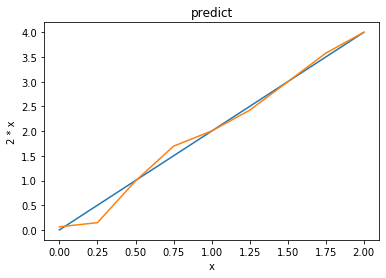

In [55]:
x = np.arange(0,2.25,0.25)
f = x*2
prd = online_perceptron([[xi,xi] for xi in x[::2]], f[::2]/10)

f_prd = []
for xi in zip(x,x):
    f_prd.append(prd(list(xi)) * 10)
    print(list(xi), f_prd[-1])    

plt.plot(x, f)
plt.plot(x, f_prd)
plt.xlabel('x')
plt.ylabel('2 * x')
plt.title('predict')